In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("CleanedData.csv", index_col = 0)

In [4]:
df.head(10)

,id,title,original_language,overview,genres,popularity,release_date,vote_average,vote_count,year,belongs_to_collection,budget,production_companies,production_countries,revenue,runtime,score
0,76600,Avatar: The Way of Water,en,Set more than a decade after the events of the...,"['Science Fiction', 'Adventure', 'Action']",329.467,2022-12-14,7.655,9839,2022,Avatar Collection,18000000.0,"['Twentieth Century Fox Film Corporation', 'Li...",['United States of America'],4.288672e+07,108.0,7.62
1,9552,The Exorcist,en,12-year-old Regan MacNeil begins to adapt an e...,['Horror'],114.989,1973-12-26,7.721,7254,1973,The Exorcist Collection,8000000.0,"['Warner Bros.', 'Hoya Productions']",['United States of America'],4.413061e+08,122.0,7.67
2,157336,Interstellar,en,The adventures of a group of explorers who mak...,"['Adventure', 'Drama', 'Science Fiction']",132.297,2014-11-05,8.418,32591,2014,NaN,165000000.0,"['Paramount Pictures', 'Legendary Pictures', '...","['Canada', 'United States of America', 'United...",6.751200e+08,169.0,8.40
3,176,Saw,en,Obsessed with teaching his victims the value o...,"['Horror', 'Mystery', 'Crime']",382.841,2004-10-01,7.400,8344,2004,Saw Collection,1200000.0,"['Lions Gate Films', 'Twisted Pictures', 'Evol...",['United States of America'],1.039117e+08,103.0,7.37
4,671,Harry Potter and the Philosopher's Stone,en,Harry Potter has lived under the stairs at his...,"['Adventure', 'Fantasy']",199.505,2001-11-16,7.916,25390,2001,Harry Potter Collection,125000000.0,"['1492 Pictures', 'Warner Bros.', 'Heyday Films']","['United Kingdom', 'United States of America']",9.764756e+08,152.0,7.90
5,155,The Dark Knight,en,Batman raises the stakes in his war on crime. ...,"['Drama', 'Action', 'Crime', 'Thriller']",110.984,2008-07-16,8.511,30639,2008,The Dark Knight Collection,185000000.0,"['DC Comics', 'Legendary Pictures', 'Warner Br...","['United Kingdom', 'United States of America']",1.004558e+09,152.0,8.49
6,11,Star Wars,en,Princess Leia is captured and held hostage by ...,"['Adventure', 'Action', 'Science Fiction']",91.676,1977-05-25,8.204,19164,1977,Star Wars Collection,11000000.0,"['Lucasfilm', 'Twentieth Century Fox Film Corp...",['United States of America'],7.753980e+08,121.0,8.17
7,19995,Avatar,en,"In the 22nd century, a paraplegic Marine is di...","['Action', 'Adventure', 'Fantasy', 'Science Fi...",104.417,2009-12-15,7.573,29824,2009,Avatar Collection,237000000.0,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2.787965e+09,162.0,7.56
8,603,The Matrix,en,"Set in the 22nd century, The Matrix tells the ...","['Action', 'Science Fiction']",76.635,1999-03-30,8.206,23833,1999,The Matrix Collection,63000000.0,"['Village Roadshow Pictures', 'Groucho II Film...","['Australia', 'United States of America']",4.635174e+08,136.0,8.18
9,948,Halloween,en,Fifteen years after murdering his sister on Ha...,"['Horror', 'Thriller']",75.657,1978-10-24,7.561,4988,1978,Halloween Collection,300000.0,"['Compass International Pictures', 'Falcon Int...",['United States of America'],7.000000e+07,91.0,7.50


In [5]:
df_clu = df[['popularity', 'budget', 'revenue', 'runtime', 'score']]

In [6]:
df_clu.head(10)

,popularity,budget,revenue,runtime,score
0,329.467,18000000.0,4.288672e+07,108.0,7.62
1,114.989,8000000.0,4.413061e+08,122.0,7.67
2,132.297,165000000.0,6.751200e+08,169.0,8.40
3,382.841,1200000.0,1.039117e+08,103.0,7.37
4,199.505,125000000.0,9.764756e+08,152.0,7.90
5,110.984,185000000.0,1.004558e+09,152.0,8.49
6,91.676,11000000.0,7.753980e+08,121.0,8.17
7,104.417,237000000.0,2.787965e+09,162.0,7.56
8,76.635,63000000.0,4.635174e+08,136.0,8.18
9,75.657,300000.0,7.000000e+07,91.0,7.50


In [7]:
def normalize(df, columns_to_normalize):
    df_normalized = df.copy()
    
    for column in columns_to_normalize:
        min_value = df[column].min()
        max_value = df[column].max()
        
        df_normalized[column] = (100 * (df[column] - min_value) / (max_value - min_value)).round(2)
    
    return df_normalized

In [8]:
columns_to_normalize = ['popularity', 'budget', 'revenue', 'runtime']

In [9]:
df_normalized = df_clu.copy()
df_normalized = normalize(df_normalized, columns_to_normalize)

In [10]:
df_normalized.head(10)

,popularity,budget,revenue,runtime,score
0,86.04,4.74,1.54,33.44,7.62
1,29.93,2.11,15.83,37.90,7.67
2,34.45,43.42,24.22,52.87,8.40
3,100.00,0.32,3.73,31.85,7.37
4,52.04,32.89,35.02,47.45,7.90
5,28.88,48.68,36.03,47.45,8.49
6,23.83,2.89,27.81,37.58,8.17
7,27.16,62.37,100.00,50.64,7.56
8,19.89,16.58,16.63,42.36,8.18
9,19.64,0.08,2.51,28.03,7.50


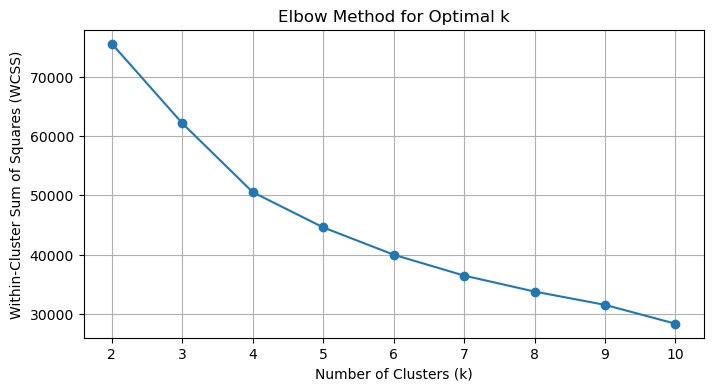

In [11]:
from sklearn.cluster import KMeans

# Randomly sample 500 points from the dataset
sampled_df = df_normalized.sample(n=500, random_state=42)

# Initialize a list to store the within-cluster sum of squares (WCSS) for different k values
wcss = []

# Try different values of k (number of clusters)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sampled_df)
    # Append the WCSS for this k value
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

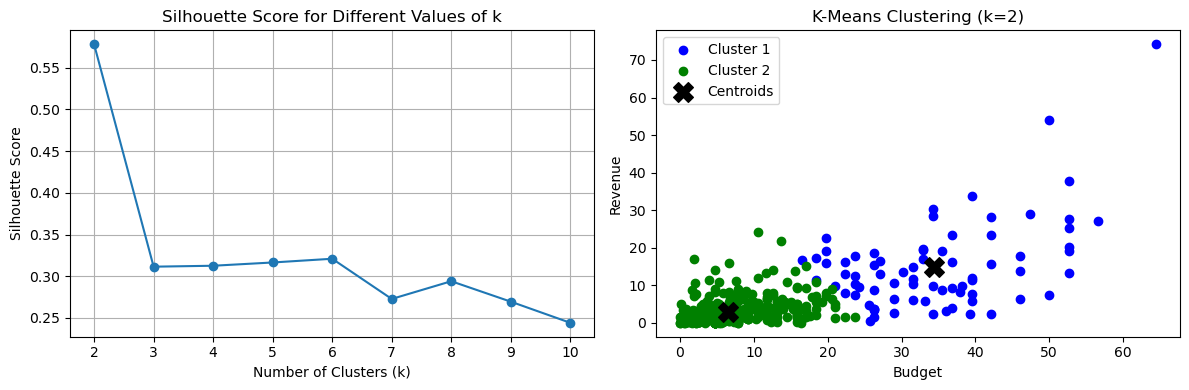

The optimal number of clusters is 2 with a Silhouette score of 0.58


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Randomly sample 500 points from the dataset
sampled_df = df_normalized.sample(n=500, random_state=42)

# Initialize variables to store the results
best_score = -1
best_k = 0
silhouette_scores = []

# Try different values of k (number of clusters)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(sampled_df)
    cluster_labels = kmeans.labels_

    # Calculate the Silhouette score
    score = silhouette_score(sampled_df, cluster_labels)
    silhouette_scores.append(score)

    # Check if this k has a higher Silhouette score
    if score > best_score:
        best_score = score
        best_k = k

# Fit KMeans with the best_k value using the sampled data
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_kmeans.fit(sampled_df)
best_cluster_labels = best_kmeans.labels_

# Plot the Silhouette scores for different k values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.grid(True)

# Plot the clustered data
plt.subplot(1, 2, 2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(best_k):
    cluster_points = sampled_df[best_cluster_labels == i]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {i+1}', c=colors[i])

plt.scatter(best_kmeans.cluster_centers_[:, 1], best_kmeans.cluster_centers_[:, 2], s=200, marker='X', c='black', label='Centroids')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(f'K-Means Clustering (k={best_k})')
plt.legend()

plt.tight_layout()
plt.show()

print(f"The optimal number of clusters is {best_k} with a Silhouette score of {best_score:.2f}")

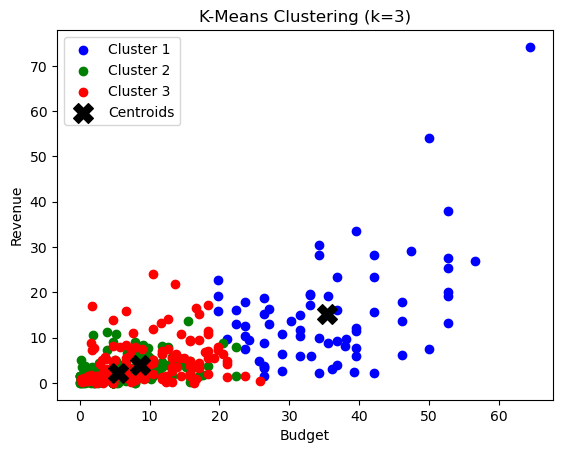

In [18]:
# Set the number of clusters to 3
n_clusters = 3

# Fit KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(sampled_df)
cluster_labels = kmeans.labels_

# Plot the clustered data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    cluster_points = sampled_df[cluster_labels == i]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {i+1}', c=colors[i])

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, marker='X', c='black', label='Centroids')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(f'K-Means Clustering (k={n_clusters})')
plt.legend()

plt.show()

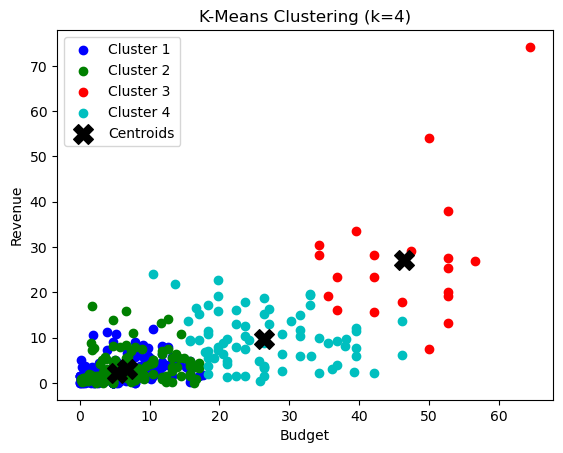

In [19]:
# Set the number of clusters to 4
n_clusters = 4

# Fit KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(sampled_df)
cluster_labels = kmeans.labels_

# Plot the clustered data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    cluster_points = sampled_df[cluster_labels == i]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {i+1}', c=colors[i])

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, marker='X', c='black', label='Centroids')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(f'K-Means Clustering (k={n_clusters})')
plt.legend()

plt.show()

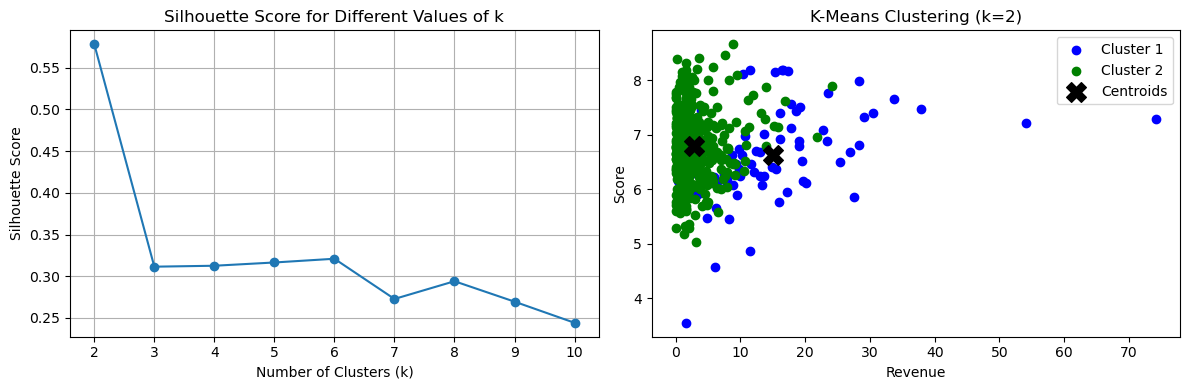

The optimal number of clusters is 2 with a Silhouette score of 0.58


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Randomly sample 500 points from the dataset
sampled_df = df_normalized.sample(n=500, random_state=42)

# Initialize variables to store the results
best_score = -1
best_k = 0
silhouette_scores = []

# Try different values of k (number of clusters)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(sampled_df)
    cluster_labels = kmeans.labels_

    # Calculate the Silhouette score
    score = silhouette_score(sampled_df, cluster_labels)
    silhouette_scores.append(score)

    # Check if this k has a higher Silhouette score
    if score > best_score:
        best_score = score
        best_k = k

# Fit KMeans with the best_k value using the sampled data
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_kmeans.fit(sampled_df)
best_cluster_labels = best_kmeans.labels_

# Plot the Silhouette scores for different k values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.grid(True)

# Plot the clustered data
plt.subplot(1, 2, 2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(best_k):
    cluster_points = sampled_df[best_cluster_labels == i]
    plt.scatter(cluster_points.iloc[:, 2], cluster_points.iloc[:, -1], label=f'Cluster {i+1}', c=colors[i])

plt.scatter(best_kmeans.cluster_centers_[:, 2], best_kmeans.cluster_centers_[:, -1], s=200, marker='X', c='black', label='Centroids')
plt.xlabel('Revenue')
plt.ylabel('Score')
plt.title(f'K-Means Clustering (k={best_k})')
plt.legend()

plt.tight_layout()
plt.show()

print(f"The optimal number of clusters is {best_k} with a Silhouette score of {best_score:.2f}")

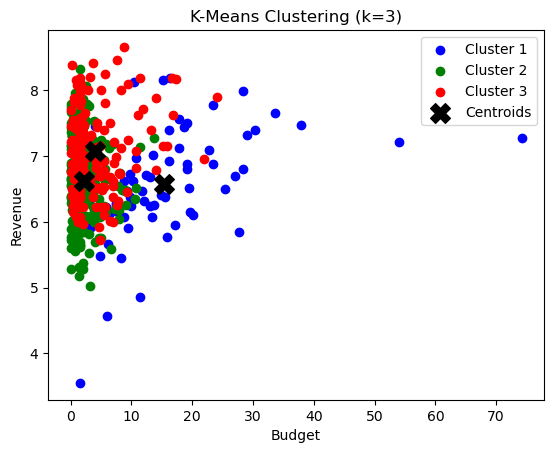

In [20]:
# Set the number of clusters to 3
n_clusters = 3

# Fit KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(sampled_df)
cluster_labels = kmeans.labels_

# Plot the clustered data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    cluster_points = sampled_df[cluster_labels == i]
    plt.scatter(cluster_points.iloc[:, 2], cluster_points.iloc[:, -1], label=f'Cluster {i+1}', c=colors[i])

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, -1], s=200, marker='X', c='black', label='Centroids')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(f'K-Means Clustering (k={n_clusters})')
plt.legend()

plt.show()

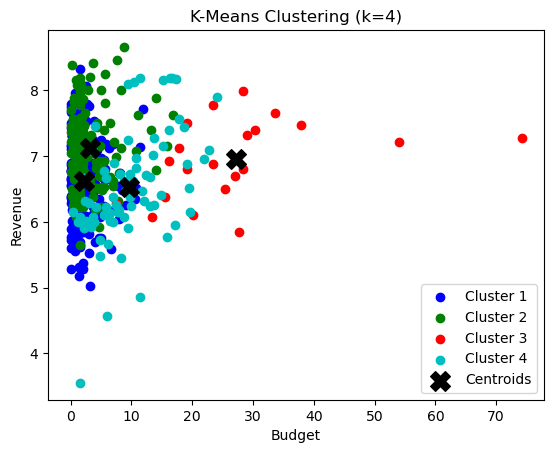

In [21]:
# Set the number of clusters to 4
n_clusters = 4

# Fit KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(sampled_df)
cluster_labels = kmeans.labels_

# Plot the clustered data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    cluster_points = sampled_df[cluster_labels == i]
    plt.scatter(cluster_points.iloc[:, 2], cluster_points.iloc[:, -1], label=f'Cluster {i+1}', c=colors[i])

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, -1], s=200, marker='X', c='black', label='Centroids')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(f'K-Means Clustering (k={n_clusters})')
plt.legend()

plt.show()

# Code to covert genres into transaction data format for ARM:

In [15]:
import pandas as pd
import json

df = pd.read_csv('movies_metadata.csv')

# Function to extract genre names
def extract_genre_names(genre_list):
    try:
        genre_list = json.loads(genre_list.replace("'", "\""))  # Replace single quotes with double quotes
        return [genre['name'] for genre in genre_list]
    except:
        return []

# Extract genre names from the 'genres' column
df['genre_names'] = df['genres'].apply(extract_genre_names)

# Create a new DataFrame with one genre per row
genre_df = df[['title', 'genre_names']].explode('genre_names')

# Save the new DataFrame to a CSV file
genre_df.to_csv('genre_data.csv', index=False)


C:\Users\luktu\AppData\Local\Temp\ipykernel_20836\368196930.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


In [16]:
import pandas as pd
import json

# Assuming 'genres' is the column containing the genre information
# Load your dataset into a pandas DataFrame
df = pd.read_csv('movies_metadata.csv')

# Function to extract genre names and strip whitespace
def extract_genre_names(genre_list):
    try:
        genre_list = json.loads(genre_list.replace("'", "\""))  # Replace single quotes with double quotes
        return [genre['name'].strip() for genre in genre_list]  # Strip whitespace from genre names
    except:
        return []

# Extract genre names from the 'genres' column
df['genre_names'] = df['genres'].apply(extract_genre_names)

# Create a new DataFrame with separate columns for each genre
genre_df = df[['title', 'genre_names']].explode('genre_names').pivot(columns='genre_names', values='genre_names')

# Save the new DataFrame to a CSV file
genre_df.to_csv('genre.csv', index=False)


C:\Users\luktu\AppData\Local\Temp\ipykernel_20836\3789174246.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')
